In [14]:
import pandas as pd
import os
import numpy as np
url = "/Users/lucileyibingchen/Downloads/Diabetes_Data.csv"
data =  pd.read_csv(url)
# data
data["Gender"] = data["Gender"].map({"男生":1,"女生":0})
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,1,1
1,66,102,128.1,0,1
2,59,65,103.9,1,0
3,46,117,94.8,0,0
4,45,79,57.8,1,0
...,...,...,...,...,...
395,72,63,97.1,0,0
396,22,117,156.7,0,1
397,31,76,119.0,1,0
398,36,65,96.3,0,1


In [28]:
from sklearn.model_selection import train_test_split 
x = data[["Age","Weight","BloodSugar","Gender"]]
y = data["Diabetes"]

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 87)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_train.size




1280

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
# 或者以上两步可以合并为x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[-0.13049114, -0.12021965,  0.35271768,  0.93933644],
       [-0.49202504, -0.07737968, -0.61346817,  0.93933644],
       [-1.27534849, -0.2915795 , -0.35668905, -1.06458129],
       ...,
       [-0.31125809, -1.19121871,  0.76617559,  0.93933644],
       [-0.43176939, -1.44825849, -1.51872338,  0.93933644],
       [ 1.19513315,  0.8650995 , -0.33057592, -1.06458129]])

In [34]:
# mannual way to compute sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))
w = np.array([1,2,3,4])
b = 1

z = (w*x_train).sum(axis=1)+b
sigmoid(z)

array([9.95698875e-01, 9.06375097e-01, 2.05197222e-03, 9.99871937e-01,
       9.99976601e-01, 9.99597573e-01, 9.42501826e-03, 6.58750315e-01,
       9.72220502e-01, 2.04535575e-03, 9.95406153e-01, 9.33440694e-01,
       9.99020890e-01, 6.88676986e-03, 8.77843224e-05, 7.26538573e-01,
       9.32368144e-01, 8.09433980e-02, 1.22884071e-02, 6.59095116e-01,
       9.35714906e-01, 6.38508320e-02, 3.04389233e-01, 9.30273981e-01,
       1.23897708e-03, 9.93625786e-01, 5.90053392e-02, 9.86068856e-01,
       1.89102010e-04, 1.33090984e-03, 8.85296779e-01, 9.99482973e-01,
       4.70219520e-04, 9.99353194e-01, 1.87660501e-01, 9.95430646e-01,
       9.98245826e-01, 9.99905804e-01, 9.77808458e-01, 4.92634254e-03,
       9.98319405e-01, 9.99759816e-01, 1.56719013e-01, 4.11932567e-01,
       1.47183312e-01, 8.92262698e-01, 9.92187079e-01, 1.02910854e-01,
       8.61895492e-01, 5.88617508e-02, 9.36987924e-02, 3.51332925e-01,
       9.22153819e-01, 2.12994568e-02, 6.66132695e-01, 9.13035739e-01,
      

In [38]:
#或者直接调库
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)



LogisticRegression(random_state=0)

In [40]:
y_pred = classifier.predict(x_test)
temp = pd.DataFrame({"actual":y_test,"prediction":y_pred})
temp

,actual,prediction
344,1,1
34,0,0
194,0,0
249,1,0
71,0,0
...,...,...
92,0,0
299,0,0
228,0,0
16,1,1


In [42]:
classifier.predict_proba(x_test)

array([[1.77424531e-01, 8.22575469e-01],
       [8.50511296e-01, 1.49488704e-01],
       [9.99971886e-01, 2.81142548e-05],
       [7.20868361e-01, 2.79131639e-01],
       [9.47537269e-01, 5.24627313e-02],
       [9.94623597e-01, 5.37640291e-03],
       [8.46587597e-01, 1.53412403e-01],
       [8.15106574e-03, 9.91848934e-01],
       [8.96285131e-01, 1.03714869e-01],
       [8.11373303e-02, 9.18862670e-01],
       [5.08866927e-01, 4.91133073e-01],
       [9.84242637e-01, 1.57573634e-02],
       [9.99907517e-01, 9.24832199e-05],
       [9.74594532e-01, 2.54054682e-02],
       [7.03153903e-01, 2.96846097e-01],
       [9.02788946e-01, 9.72110543e-02],
       [8.89921294e-01, 1.10078706e-01],
       [9.97937982e-01, 2.06201777e-03],
       [9.95390680e-01, 4.60931951e-03],
       [9.99154702e-01, 8.45298425e-04],
       [8.50225634e-01, 1.49774366e-01],
       [8.14788715e-01, 1.85211285e-01],
       [2.67999839e-01, 7.32000161e-01],
       [9.35688489e-01, 6.43115112e-02],
       [3.679304

In [46]:
# compare the results and create a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[49  3]
 [ 6 22]]


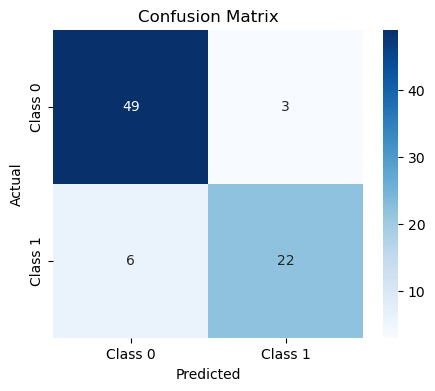

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

